In [1]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

class BA_model():
    def __init__(self, n=10000, m=1, seed=3):
        self.n = n
        self.m = m
        self.seed = seed
        
        # initial condition
        self.nodes = list(range(seed))
        self.N = len(self.nodes)
        
        self.adj_list = [[i-1, i+1] for i in range(self.N)] # make ring graph, two links per one node
        # connect each end of the ring
        self.adj_list[0][0] = self.nodes[-1]
        self.adj_list[-1][-1] = self.nodes[0]
        
        # make pool
        self.pool = self.nodes * 2 # every node has two links.
        self.P = len(self.pool)
        
        # growth of the network
        for i in range(n-seed):
            self.nodes.append(self.N) # adding a new node
            
            targets=[]
            counter=0
            # choose a node which will be connected to a new node.
            while counter < self.m:
                r = np.random.randint(self.P)
                if self.pool[r] not in targets:
                    targets.append(self.pool[r])
                    counter+=1
                    
            # update the pool
            self.pool += targets
            self.pool +=  [self.N] * self.m # a new node has m links
            self.P += 2*self.m
            
            for j in targets:
                self.adj_list[j] += [self.N] # adding a new node to a target node
            self.adj_list += [targets] # adding a target node to a new node
            
            self.N += 1

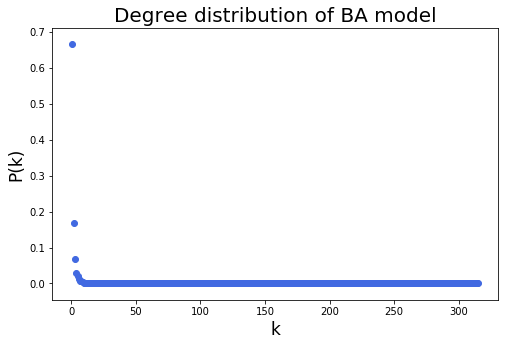

In [2]:
a = BA_model()

# extract degrees, k.
k = [len(a.adj_list[i]) for i in range(len(a.adj_list))]
y, x = np.histogram(k, bins=np.max(k)-np.min(k))
y=y.astype('float')
y/=np.sum(y)

plt.figure(figsize=(8,5))
plt.scatter(x[:-1], y, color='royalblue')
plt.xlabel("k", fontsize=17)
plt.ylabel("P(k)", fontsize=17)
plt.title('Degree distribution of BA model', fontsize=20)
plt.show()

Calculating best minimal value for power law fit


alpha = 2.5772541488998657 sigma = 0.03871218053559352


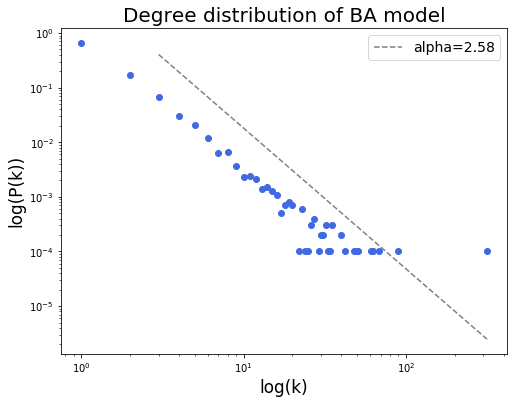

In [17]:
# plot degree distribution in loglog & fitting
plt.figure(figsize=(8,6))
plt.loglog(x[:-1],y,'o',color='royalblue')
plt.xlabel("log(k)", fontsize=17)
plt.ylabel("log(P(k))", fontsize=17)
plt.title('Degree distribution of BA model', fontsize=20)

fit=powerlaw.Fit(k, discrete=True)
fit.power_law.plot_pdf(ls='--', c='grey', label="alpha=%.2f" %fit.power_law.alpha)
plt.legend(fontsize=14)

print('alpha =', fit.power_law.alpha, 'sigma =', fit.power_law.sigma)